In [1]:
from citipy import citipy
from random import random
import numpy as np
from random import uniform
import matplotlib.pyplot as plt
import openweathermapy as ow
import pandas as pd
import time
import requests as req

In [2]:
list1 = np.random.uniform(-80,80, size = 1200)
list2 = np.random.uniform(-180,180, size = 1200)
list1_df = pd.DataFrame({"Lat": list1, "Lng": list2})
list1_df.head()
list1_df.count()

Lat    1200
Lng    1200
dtype: int64

In [3]:
list1_df["City"] = ""
list1_df["Country"] = ""

# Use citipy to find the nearest city to given random coords and write into the DF
for index, row in list1_df.iterrows():
    city = citipy.nearest_city(row["Lat"], row["Lng"])
    list1_df.set_value(index, "City", city.city_name)
    list1_df.set_value(index, "Country", city.country_code)

# Remove duplicate cities
list1_df = list1_df.drop_duplicates(["City"], keep='first')
list1_df.head()

,Lat,Lng,City,Country
0,-23.148371,41.638834,toliary,mg
1,-16.676295,72.728618,quatre cocos,mu
2,-17.737175,162.523397,poum,nc
3,-77.963676,-163.681961,mataura,pf
4,-11.951457,-81.678209,huarmey,pe


In [5]:
akey = "34ae2627193903bb86906bf116b20b46"
url = "http://api.openweathermap.org/data/2.5/weather?q="

list1_df["Max Temp"] = ""
list1_df["Hum"] = ""
list1_df["Cloud"] = ""
list1_df["Wind"] = ""

SleepCounter = 0
PullCounter = 0
BatchCounter = 1

# Loop through the APIs to construct new columns in df
for index, row in list1_df.iterrows():
    try:
        query = url + row["City"].replace(" ","+") + "," + row["Country"] + "&appid=" + akey + "&units=imperial"
        #get = req.get(query)
        result = req.get(query).json()
        #print(result)
        list1_df.set_value(index, "Max Temp", result["main"]["temp_max"])
        list1_df.set_value(index, "Hum", result["main"]["humidity"])
        list1_df.set_value(index, "Cloud", result["clouds"]["all"])
        list1_df.set_value(index, "Wind", result["wind"]["speed"])
    except:
        list1_df.set_value(index, "Max Temp", "FAIL")
    
        PullCounter += 1
    
        SleepCounter += 1
    
    # If loop to ensure not overloading the weather API
    if SleepCounter == 40:
        print("~~~ Break Time ~~~")
        time.sleep(10)
        print("")
        SleepCounter = 0
        BatchCounter += 1       
    
    
    # Printing API link
    print("Processing Record " + str(PullCounter) + " of Set " + str(BatchCounter) +" | " + row["City"])
    print(query)

Processing Record 1 of Set 1 | toliary
http://api.openweathermap.org/data/2.5/weather?q=toliary,mg&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 1 of Set 1 | quatre cocos
http://api.openweathermap.org/data/2.5/weather?q=quatre+cocos,mu&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 1 of Set 1 | poum
http://api.openweathermap.org/data/2.5/weather?q=poum,nc&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 2 of Set 1 | mataura
http://api.openweathermap.org/data/2.5/weather?q=mataura,pf&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 2 of Set 1 | huarmey
http://api.openweathermap.org/data/2.5/weather?q=huarmey,pe&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 2 of Set 1 | salalah
http://api.openweathermap.org/data/2.5/weather?q=salalah,om&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 2 of Set 1 | manokwari
http://api.openweathermap.org/data/2.

Processing Record 4 of Set 1 | ivdel
http://api.openweathermap.org/data/2.5/weather?q=ivdel,ru&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 4 of Set 1 | conde
http://api.openweathermap.org/data/2.5/weather?q=conde,br&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 4 of Set 1 | flinders
http://api.openweathermap.org/data/2.5/weather?q=flinders,au&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 4 of Set 1 | torbay
http://api.openweathermap.org/data/2.5/weather?q=torbay,ca&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 4 of Set 1 | avarua
http://api.openweathermap.org/data/2.5/weather?q=avarua,ck&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 4 of Set 1 | shirokiy
http://api.openweathermap.org/data/2.5/weather?q=shirokiy,ru&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 5 of Set 1 | barentsburg
http://api.openweathermap.org/data/2.5/weather?

Processing Record 11 of Set 1 | pevek
http://api.openweathermap.org/data/2.5/weather?q=pevek,ru&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 11 of Set 1 | erenhot
http://api.openweathermap.org/data/2.5/weather?q=erenhot,cn&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 11 of Set 1 | mar del plata
http://api.openweathermap.org/data/2.5/weather?q=mar+del+plata,ar&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 11 of Set 1 | najran
http://api.openweathermap.org/data/2.5/weather?q=najran,sa&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 11 of Set 1 | bluff
http://api.openweathermap.org/data/2.5/weather?q=bluff,nz&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 11 of Set 1 | poronaysk
http://api.openweathermap.org/data/2.5/weather?q=poronaysk,ru&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 11 of Set 1 | kruisfontein
http://api.openweathermap

Processing Record 19 of Set 1 | puerto madero
http://api.openweathermap.org/data/2.5/weather?q=puerto+madero,mx&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 19 of Set 1 | tecoanapa
http://api.openweathermap.org/data/2.5/weather?q=tecoanapa,mx&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 19 of Set 1 | javornik
http://api.openweathermap.org/data/2.5/weather?q=javornik,cz&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 20 of Set 1 | mahon
http://api.openweathermap.org/data/2.5/weather?q=mahon,es&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 20 of Set 1 | ribeira grande
http://api.openweathermap.org/data/2.5/weather?q=ribeira+grande,pt&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 20 of Set 1 | geraldton
http://api.openweathermap.org/data/2.5/weather?q=geraldton,ca&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 20 of Set 1 | jamestown
ht

Processing Record 32 of Set 1 | villazon
http://api.openweathermap.org/data/2.5/weather?q=villazon,bo&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 33 of Set 1 | amderma
http://api.openweathermap.org/data/2.5/weather?q=amderma,ru&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 34 of Set 1 | tumannyy
http://api.openweathermap.org/data/2.5/weather?q=tumannyy,ru&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 34 of Set 1 | tarauaca
http://api.openweathermap.org/data/2.5/weather?q=tarauaca,br&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 34 of Set 1 | barrow
http://api.openweathermap.org/data/2.5/weather?q=barrow,us&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 34 of Set 1 | nanortalik
http://api.openweathermap.org/data/2.5/weather?q=nanortalik,gl&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 34 of Set 1 | bilma
http://api.openweathermap.or

Processing Record 42 of Set 2 | iowa city
http://api.openweathermap.org/data/2.5/weather?q=iowa+city,us&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 42 of Set 2 | luderitz
http://api.openweathermap.org/data/2.5/weather?q=luderitz,na&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 42 of Set 2 | santana
http://api.openweathermap.org/data/2.5/weather?q=santana,br&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 42 of Set 2 | barabai
http://api.openweathermap.org/data/2.5/weather?q=barabai,id&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 42 of Set 2 | nishihara
http://api.openweathermap.org/data/2.5/weather?q=nishihara,jp&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 42 of Set 2 | kidal
http://api.openweathermap.org/data/2.5/weather?q=kidal,ml&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 42 of Set 2 | wildwood
http://api.openweathermap.org

Processing Record 51 of Set 2 | blackwater
http://api.openweathermap.org/data/2.5/weather?q=blackwater,au&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 51 of Set 2 | havre-saint-pierre
http://api.openweathermap.org/data/2.5/weather?q=havre-saint-pierre,ca&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 51 of Set 2 | baykalsk
http://api.openweathermap.org/data/2.5/weather?q=baykalsk,ru&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 51 of Set 2 | niksic
http://api.openweathermap.org/data/2.5/weather?q=niksic,me&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 51 of Set 2 | nowogard
http://api.openweathermap.org/data/2.5/weather?q=nowogard,pl&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 51 of Set 2 | ponorogo
http://api.openweathermap.org/data/2.5/weather?q=ponorogo,id&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 51 of Set 2 | marrakesh
ht

Processing Record 55 of Set 2 | agirish
http://api.openweathermap.org/data/2.5/weather?q=agirish,ru&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 56 of Set 2 | attawapiskat
http://api.openweathermap.org/data/2.5/weather?q=attawapiskat,ca&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 56 of Set 2 | adrar
http://api.openweathermap.org/data/2.5/weather?q=adrar,dz&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 56 of Set 2 | faro
http://api.openweathermap.org/data/2.5/weather?q=faro,pt&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 56 of Set 2 | chicama
http://api.openweathermap.org/data/2.5/weather?q=chicama,pe&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 57 of Set 2 | codrington
http://api.openweathermap.org/data/2.5/weather?q=codrington,ag&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 57 of Set 2 | mercedes
http://api.openweathermap.org

Processing Record 61 of Set 2 | sisimiut
http://api.openweathermap.org/data/2.5/weather?q=sisimiut,gl&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 61 of Set 2 | san juan
http://api.openweathermap.org/data/2.5/weather?q=san+juan,ar&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 61 of Set 2 | victoria point
http://api.openweathermap.org/data/2.5/weather?q=victoria+point,au&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 61 of Set 2 | port hedland
http://api.openweathermap.org/data/2.5/weather?q=port+hedland,au&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 61 of Set 2 | komsomolskiy
http://api.openweathermap.org/data/2.5/weather?q=komsomolskiy,ru&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 61 of Set 2 | juneau
http://api.openweathermap.org/data/2.5/weather?q=juneau,us&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 61 of Set 2 | porto sa

Processing Record 66 of Set 2 | bathsheba
http://api.openweathermap.org/data/2.5/weather?q=bathsheba,bb&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 66 of Set 2 | shizunai
http://api.openweathermap.org/data/2.5/weather?q=shizunai,jp&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 66 of Set 2 | chipoka
http://api.openweathermap.org/data/2.5/weather?q=chipoka,mw&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 66 of Set 2 | kolyvan
http://api.openweathermap.org/data/2.5/weather?q=kolyvan,ru&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 66 of Set 2 | fortuna
http://api.openweathermap.org/data/2.5/weather?q=fortuna,us&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 66 of Set 2 | nizhnyaya tavda
http://api.openweathermap.org/data/2.5/weather?q=nizhnyaya+tavda,ru&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 66 of Set 2 | mount gambier
http://a

Processing Record 71 of Set 2 | haines junction
http://api.openweathermap.org/data/2.5/weather?q=haines+junction,ca&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 71 of Set 2 | hirara
http://api.openweathermap.org/data/2.5/weather?q=hirara,jp&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 71 of Set 2 | abdanan
http://api.openweathermap.org/data/2.5/weather?q=abdanan,ir&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 71 of Set 2 | port hardy
http://api.openweathermap.org/data/2.5/weather?q=port+hardy,ca&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 71 of Set 2 | kirakira
http://api.openweathermap.org/data/2.5/weather?q=kirakira,sb&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 71 of Set 2 | dong hoi
http://api.openweathermap.org/data/2.5/weather?q=dong+hoi,vn&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 71 of Set 2 | beringovskiy
http://

In [6]:
# Remove any rows that did not have data and run a final count to ensure a large enough data table
final_df = list1_df.loc[list1_df["Max Temp"] != "FAIL"]
final_df


,Lat,Lng,City,Country,Max Temp,Hum,Cloud,Wind
1,-16.676295,72.728618,quatre cocos,mu,77,88,75,1.12
2,-17.737175,162.523397,poum,nc,76.36,100,92,24.11
4,-11.951457,-81.678209,huarmey,pe,70.78,67,44,2.86
5,18.738874,50.054121,salalah,om,78.8,69,40,3.36
6,1.871107,133.469534,manokwari,id,83.97,96,0,5.82
7,69.111009,157.670203,cherskiy,ru,-2.26,72,48,3.87
8,-44.977000,164.433144,te anau,nz,61.33,76,56,18.12
9,-9.469816,-54.378408,alta floresta,br,75.28,93,88,1.23
10,-37.996864,113.172020,busselton,au,72,93,100,21.09
11,21.774661,-38.254023,ponta do sol,cv,70.24,99,12,22.88


In [8]:
# Make new df's to plot
temp_df = final_df[["Lat","Max Temp"]]
hum_df = final_df[["Lat", "Hum"]]
cloud_df = final_df[["Lat", "Cloud"]]
wind_df = final_df[["Lat", "Wind"]]


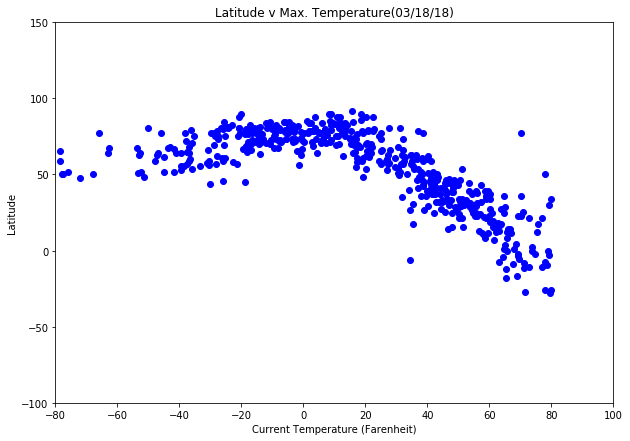

In [15]:
# Lat v Temp scatter plot
plt.figure(figsize=(10,7))
plt.scatter(temp_df["Lat"],temp_df["Max Temp"], color = "blue")
plt.title("Latitude v Max. Temperature(03/18/18)")
plt.xlabel("Current Temperature (Farenheit)")
plt.ylabel("Latitude")
plt.ylim(-100, 150)
plt.xlim(-80,100)
plt.savefig("Lat_Temp.png")
plt.show()

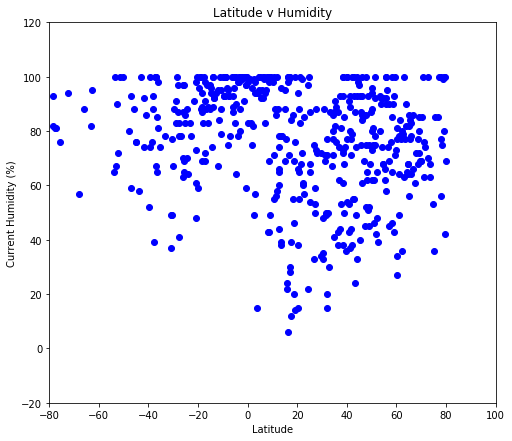

In [24]:
# Lat v Hum scatter plot
plt.figure(figsize=(8,7))
plt.scatter(hum_df["Lat"],hum_df["Hum"], color = "blue")
plt.title("Latitude v Humidity")
plt.ylabel("Current Humidity (%)")
plt.xlabel("Latitude")
plt.ylim(-20, 120)
plt.xlim(-80,100)
plt.savefig("Lat_Hum.png")
plt.show()

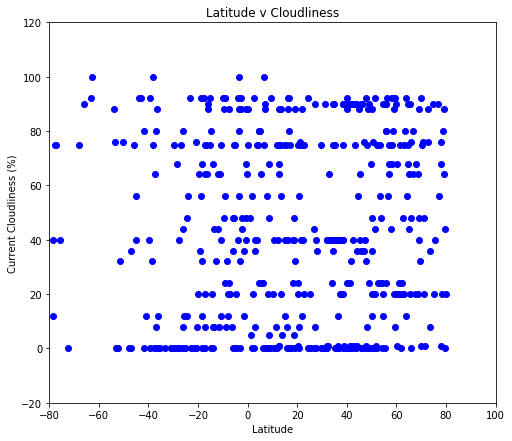

In [25]:
# Lat v cloudliness scatter plot
plt.figure(figsize=(8,7))
plt.scatter(cloud_df["Lat"],cloud_df["Cloud"], color = "blue")
plt.title("Latitude v Cloudliness")
plt.ylabel("Current Cloudliness (%)")
plt.xlabel("Latitude")
plt.ylim(-20, 120)
plt.xlim(-80,100)
plt.savefig("Lat_Cloud.png")
plt.show()

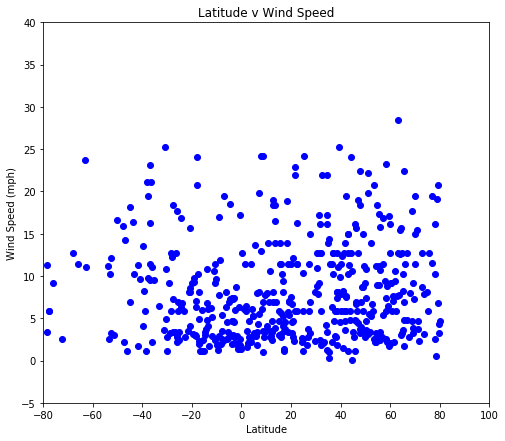

In [26]:
# Lat v Wind Speed scatter plot
plt.figure(figsize=(8,7))
plt.scatter(wind_df["Lat"],wind_df["Wind"], color = "blue")
plt.title("Latitude v Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.ylim(-5, 40)
plt.xlim(-80,100)
plt.savefig("Lat_Wind.png")
plt.show()